###                 Arbre de Decision

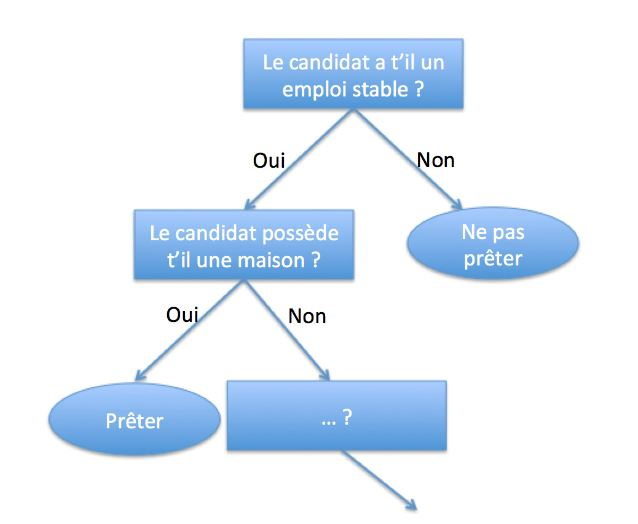

1) Importer les librairies classiques : numpy, pandas, seaborn et matplolib

In [49]:
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt


2) Lire le fichier iris_data_V2.csv avec pandas

In [50]:
#Ouverture du fichier csv avec le séprarteur virgule
df=pd.read_csv('iris_data_V2.csv',sep=",")
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


3) Lire les trois premières lignes du fichier. Donner le nombre de lignes et de colonnes

In [51]:
#Affichage du format du fichier (lignes,colonnes)
print(df.shape)
#Affichage 3 première lignes du fchier
df[:][0:3]

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


4) Créer cinq listes(array) sepal_length,sepal_widthpetal_length,petal_width et target ou species

In [52]:
#Création de 5 listes d'array
sepal_length=np.array(df['sepal_length'])
sepal_width=np.array(df['sepal_width'])
petal_length=np.array(df['petal_length'])
petal_width=np.array(df['petal_width'])
target=np.array(df['target'])

5) Créer une listes(array) contenant sepal_length,sepal_widthpetal_length,petal_width

In [53]:
sepal_petal=np.array(df.drop(['target'],axis=1))

6) Importer le modèle "tree",  from sklearn import tree  <

In [54]:
from sklearn import tree

6) Creer le modèle   <  tree.DecisionTreeClassifier()> et faire l'entrainement

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sepal_petal, target, test_size=0.2, random_state=0)

decision=tree.DecisionTreeClassifier()
decision.fit(X_train,y_train)

#Liste d'estimation des donées test
print(decision.predict(X_test))

#Coefficient de détermination du modèle
decision.score(X_test,y_test)

#Le score vaut 1 donc modèle très satisfaisant

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


1.0

7) Tracer l'arbre  <  tree.plot_tree()  >

[Text(133.92000000000002, 195.696, 'petal_length <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]\nclass = virbinica'),
 Text(100.44000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = setosa'),
 Text(167.40000000000003, 152.208, 'petal_length <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]\nclass = virbinica'),
 Text(66.96000000000001, 108.72, 'petal_width <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = versicolor'),
 Text(33.480000000000004, 65.232, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = versicolor'),
 Text(100.44000000000001, 65.232, 'sepal_width <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virbinica'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virbinica'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(267.84000000000003, 108.72, 'petal_length <= 5.05\ngini = 0.053\nsamples = 37\nvalue =

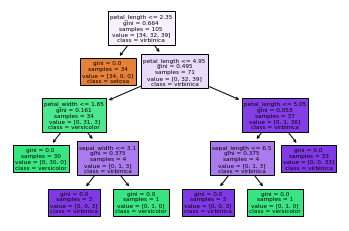

In [56]:
#affichage de l'arbre de décision avec les noms des critères et des classes
tree.plot_tree(decision,filled=True,feature_names=['sepal_length','sepal_width','petal_length','petal_width'] ,class_names=['setosa','versicolor','virbinica'])


8)Verifier sepal_length=4.7,sepal_width=3.2, petal_length=1.3,petal_width=0.2

In [61]:
print(decision.predict([[4.7,3.2,1.3,0.2]]))
#La condition du noeud 0 est directement vérifié et donc l'échantillon est transmis au noeud 1 (qui est une feuille) qui donne la classe setosa (O)
#Cette échantillon est vérifié

print(decision.predict([[4.7,3.2,2.45,0.2]]))
#La condition du noeud 0 n'est pas vérifié et donc l'échantillon est transmis au noeud 2. 
#La condition du noeud 2 est vérifié et donc échantillon passe au noeud 3
#La condition du noeud 3 est vérifié et donc échantillon passe au noeud 6 (qui est une feuille) qui donne la classe versicolor(1)
#Cette échantillon est vérifié

print(decision.predict([[4.7,3.2,5.0,0.2]]))
#La condition du noeud 0 n'est pas vérifié et donc l'échantillon est transmis au noeud 2. 
#La condition du noeud 2 n'est pas vérifié et donc échantillon passe au noeud 4
#La condition du noeud 4 n'est pas vérifié et donc échantillon passe au noeud 7
#La condition du noeud 7 n'est pas vérifié et donc échantillon passe au noeud 11
#La condition du noeud 11 est vérifié et donc échantillon passe au noeud 6 (qui est une feuille) qui donne la classe virbinica(2)
#Cette échantillon est vérifié


#Remarque :Ces commentaires on été fait pour un modèle d'entrainement donné (l'arbre est en image jpg dans le zip), les noeuds et conditions peuvent donc changés, mais pas les résultats

[0]
[1]
[2]
